In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
%matplotlib inline

In [67]:
pd.set_option('display.max_rows', 10)

In [68]:
df = pd.read_csv ('X1.csv', header =None)

In [69]:
y = df.mean(axis = 0)

In [70]:
Xs = np.linspace(0,50,51)

In [71]:
""" Spline with 8 knots"""
assert len(Xs)==len(y)
knot = np.linspace(0,50,10)

In [72]:
h1 = lambda x: 1
h2 = lambda x: x
h3 = lambda x: x**2
h4 = lambda x: x**3
h5 = lambda x: (x-knot[1])**3 if x > knot[1] else 0
h6 = lambda x: (x-knot[2])**3 if x > knot[2] else 0
h7 = lambda x: (x-knot[3])**3 if x > knot[3] else 0
h8 = lambda x: (x-knot[4])**3 if x > knot[4] else 0
h9 = lambda x: (x-knot[5])**3 if x > knot[5] else 0
h10 = lambda x: (x-knot[6])**3 if x > knot[6] else 0
h11 = lambda x: (x-knot[7])**3 if x > knot[7] else 0
h12 = lambda x: (x-knot[8])**3 if x > knot[8] else 0

def h(x):
    return np.array([h1(x), h2(x), h3(x), h4(x), h5(x), h6(x), h7(x), h8(x), h9(x), h10(x), h11(x), h12(x)])
H=[]
for x in Xs:
    H.append(h(x))



            


In [73]:
H = np.array(H)

In [74]:
gamma = np.dot(H.transpose(), H)

In [75]:
sigma = np.linalg.inv(gamma)

In [76]:
alpha = np.dot(sigma, H.transpose())

In [77]:
beta = np.dot(alpha, y)

In [78]:
beta

array([ 3.36381511e+00, -1.20866656e+00,  2.96801730e-02,  3.80846416e-03,
       -6.11238183e-03, -2.75479643e-03,  3.88079980e-03,  3.80701155e-03,
       -1.21037445e-04, -3.55360399e-03, -1.11241720e-03,  1.38520336e-03])

In [79]:
y_pred = np.dot(H, beta)

In [80]:
assert len(y_pred)== len(y)

In [81]:
""" Smoothing Spline"""
import csaps
import math
sp = csaps.UnivariateCubicSmoothingSpline(Xs,y, smooth =0.01)

In [82]:
""" Bspline with 8 knots and M =3"""
knot = np.linspace(0,50,8, endpoint = True)

In [83]:
knot = np.append([0,0,0], knot)
knot = np.append(knot, [50,50,50])

In [84]:
tck =[knot, [Xs,y], 3]

In [85]:
u3=np.linspace(0,50,100,endpoint=True)
out = interpolate.splev(u3,tck) 

In [ ]:
""" Kernel Regression with Gaussian Kernel"""
import math
import numpy as np
from scipy import interpolate
c = 1/np.sqrt(2*math.pi)
z = 10
y_x = []
for i in range(0,51):
    nom =0
    det =0
    for j in range(0,51):
        while i!=j:
            k = c*np.exp(-(Xs[i]-Xs[j])**2/z**2)
            nom += k**y[j]
            det +=k
    f=nom/det
    y_x.append(f)
   
        
    

ValueError: x and y must have same first dimension, but have shapes (51,) and (0,)

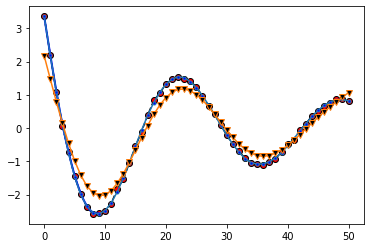

In [88]:
""" Plotting 4 methods against mean function"""
plt.plot(Xs,y,'k--',label='Mean curve',marker='o',markerfacecolor='red')
plt.plot(out[0],out[1],'b',linewidth=2.0,label='B-spline curve')
plt.plot(Xs, y_pred, label ='B-spline', marker ='.', markerfacecolor ='blue')
plt.plot(Xs, sp(Xs), label ='Smoothing Spline with alpha = 0.01', marker ='v', markerfacecolor = 'black')
plt.plot(Xs, y_x, label ='Kernel Method', marker ='H')
plt.legend(loc='best')
plt.axis([min(Xs)-1, max(Xs)+1, min(y)-1, max(y)+1])
plt.title('Cubic B-spline curve evaluation')
plt.show()

""" Based on the mean square error, Spline, Bspline and Kernel methods have good fit whiile Smoothing Spline has the worst fit.
It is probably due to the fact that hyperparameter alpha in Smoothing Spline has not tuned yet. """